# Project: Wrangling and Analyze Data

In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
import re
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter-archive-enhanced.csv)

In [4]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
req = requests.get(url)
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(req.content)

In [6]:
df_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
# Read tweet_json.txt into a dataframe
with open('tweet_json.txt', 'r') as file:
    tweet_lines = file.readlines()
    
data = []

for tweet_line in tweet_lines:
    tweet_data = json.loads(tweet_line)
    tweet_id = tweet_data['id']
    retweet_count = tweet_data['retweet_count']
    favorite_count = tweet_data['favorite_count']
    data.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
    
df_tweets = pd.DataFrame(data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Before we proceed, we need to note that one of our tasks is to remove retweets, replies, and tweets without images (per project instructions).

Let's start with the **df_archive** table. We will use both visual assessment and programmatic assessment. 

In [8]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Visually, we can see that the doggo, floofer, pupper, and puppo columns should not be four separate columns. They should be one column as they are all different categories of dog, and the 'none' values should be adjusted to nulls. 

Also, the name column does not always contain actual names. I see a lot of "None" values instead of names, and I also came across a few lowercases "names" like "a", "an", and "quite". I am fairly certain these are not real dog names. 

In [9]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The timestamp column is a string. This should be converted to datetime.

Also, the tweet_id is an integer. We are not doing calculations on this identifier, therefore it should be converted to a string.

We also see 78 replies and 181 retweets that need to be removed. We will use the in_reply_to_status_id and retweeted_status_id to help with that.

Some tweets are missing images (expanded_urls). We will also want to remove those.

In [10]:
sum(df_archive.duplicated())

0

In [11]:
sum(df_archive.duplicated('tweet_id'))

0

df_archive does not have any duplicated records.

In [12]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Wacky numerator values are part of We Rate Dogs' charm, so I am not concerned with most of the odd values in rating_numerator. I do, however, want to check into the 0 minimum values for both the numerator and denominator. Those could cause problems later. I also would like to separately check rating_denominator values that are not equal to 10. We may be able to normalize those or simply drop them if there are not many.

Onwards to the **df_predictions** table!

In [13]:
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Visually, I see three issues with the predictions. First, some predictions are not actually dogs. We should simply change those to "None" or null because we do not care whether the prediction identifies an orange, a bagel, a limousine, or anything else. We only want dogs. 

Second, the breed names are not standard. Some are capitalized, some are not, and there looks to be an underscore instead of a space between words. 

Third, we do not really need three sets of predictions with three columns each per record. I want to combine the dog breeds into one column. 

In [14]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Again, the tweet_id needs to be converted to a string. 

In [15]:
sum(df_predictions.duplicated())

0

In [16]:
sum(df_predictions.duplicated('tweet_id'))

0

No duplicates here in df_predictions. Excellent!

In [17]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


I don't see anything else concerning here.

Finally, let's look at **df_tweets**.

In [18]:
df_tweets

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [19]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [20]:
sum(df_tweets.duplicated())

0

In [21]:
sum(df_tweets.duplicated('tweet_id'))

0

In [22]:
df_tweets.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


The only thing I see in df_tweets itself is that tweet_id again. It's an integer, but really needs to be a string. 

### Quality issues
1. Remove retweets, replies, and tweets without images (per project instructions).

2. The timestamp column in df_archive is a string and should be a datetime.

3. The name column in df_archive contains many lowercase "names" that are not actually names. We also should change the "None" names to nulls.

4. 0's in df_archive rating_numerator and rating_denominator columns may cause issues in our analysis.

5. df_predictions includes predictions that are not actual dogs, such as orange, bagel, etc. 

6. Non-standardized breed names in df_predictions. Fix capitalization and underscore/space issue.

7. Redundant prediction columns in df_predictions. We can combine the dog breeds into one column.

8. Convert tweet_id from an integer to a string. 

9. Large rating_denominator values in df_archive may be able to be normalized to 10 or simply dropped.

### Tidiness issues
1. In the df_archive table, doggo, floofer, pupper, and puppo are categories of dog. These should be in one column, not four different columns.

2. Data should be combined into one dataframe because there is only one observational unit.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_predictions_clean = df_predictions.copy()
df_tweets_clean = df_tweets.copy()

*Note:* I will not be cleaning the data in the order above! 

### Issue #1: The tweet_id is an integer in all tables.

#### Define: Convert tweet_id to a string as we will not be doing calculations with this identifier.

#### Code

In [24]:
df_archive_clean.tweet_id = df_archive_clean.tweet_id.astype(str)
df_predictions_clean.tweet_id = df_predictions_clean.tweet_id.astype(str)
df_tweets_clean.tweet_id = df_tweets_clean.tweet_id.astype(str)

#### Test

In [25]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [26]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [27]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Issue #2: The timestamp column in df_archive is a string.

#### Define: Convert timestamp column to datetime. 

#### Code

In [28]:
df_archive_clean.timestamp = df_archive_clean.timestamp.astype('datetime64[ns]')

#### Test

In [29]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### Issue #3: In the df_archive table, doggo, floofer, pupper, and puppo are four categories of dog in four columns.

#### Define: Combine all dog stage columns into one column. If a record has two or more dog stages, we will use the first stage encountered in the following order: doggo, floofer, pupper, puppo.

#### Code

In [30]:
df_archive_clean.loc[df_archive_clean['doggo'] == 'doggo', 'dog_stage'] = 'doggo'
df_archive_clean.loc[df_archive_clean['floofer'] == 'floofer', 'dog_stage'] = 'floofer'
df_archive_clean.loc[df_archive_clean['pupper'] == 'pupper', 'dog_stage'] = 'pupper'
df_archive_clean.loc[df_archive_clean['puppo'] == 'puppo', 'dog_stage'] = 'puppo'

Let's see if this worked on a sample before we drop the original columns.

In [31]:
df_archive_clean.dog_stage.value_counts()

pupper     257
doggo       83
puppo       30
floofer     10
Name: dog_stage, dtype: int64

In [32]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage              

Looks good. Let's drop those old columns.

In [33]:
df_archive_clean = df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### Test

In [34]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     380 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 257.8+ KB


In [35]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Issue #4: Remove retweets, replies, and tweets without images.

#### Define: Per the project instructions, we are only concerned with original tweets. We do not want to see retweets, replies, or tweets without images. How can you rate a dog if you don't have a picture?

#### Code

In [36]:
#Drop tweets where expanded_urls is null
df_archive_clean = df_archive_clean.dropna(subset=['expanded_urls'])

In [37]:
#Drop replies (in_reply_to_status_id is not null)
df_archive_clean = df_archive_clean[df_archive_clean['in_reply_to_status_id'].isnull()]

In [38]:
#Drop retweets (retweeted_status_id is not null)
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isnull()]

In [39]:
#Check it out before we continue
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2094 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null datetime64[ns]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
dog_stage                     335 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 245.4+ KB


The last step to clean up this issue is to drop the columns we now do not need. Namely, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp.

In [40]:
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [41]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
dog_stage             335 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.6+ KB


### Issue #5: Lowercase "names" and 'None' name values in df_archive.

#### Define: The name column contains some lowercase "names" that are not really names. We need to change them to None. Finally, I would prefer to change the None values to nulls.

#### Code

In [42]:
#Check out the name column so we do not have to scroll all the way back to the top
df_archive_clean.name.value_counts()

None            600
a                55
Charlie          11
Lucy             11
Oliver           10
Cooper           10
Tucker            9
Penny             9
Winston           8
the               8
Sadie             8
Lola              8
Daisy             7
Toby              7
Koda              6
Bella             6
an                6
Bo                6
Stanley           6
Bailey            6
Jax               6
Oscar             6
Leo               5
Milo              5
Scout             5
Chester           5
Buddy             5
Rusty             5
Bentley           5
Dave              5
               ... 
Snoopy            1
Bobbay            1
Ronduh            1
Betty             1
Kuyu              1
Rodney            1
Livvie            1
Mutt              1
Stuart            1
Ralph             1
Tiger             1
Severus           1
Bobby             1
Lilli             1
Brooks            1
Birf              1
Aqua              1
Noah              1
Shooter           1


In [43]:
#Change all lowercase "names" to 'None'.
df_archive_clean.name = df_archive_clean.name.str.replace('^[a-z]+', 'None')

In [44]:
#Change 'None' to null
df_archive_clean['name'].replace('None', np.nan, inplace=True)

#### Test

In [45]:
df_archive_clean.name.value_counts()

Charlie         11
Lucy            11
Cooper          10
Oliver          10
Penny            9
Tucker           9
Sadie            8
Winston          8
Lola             8
Toby             7
Daisy            7
Bo               6
Oscar            6
Stanley          6
Bella            6
Jax              6
Bailey           6
Koda             6
Scout            5
Chester          5
Bentley          5
Milo             5
Leo              5
Buddy            5
Rusty            5
Dave             5
Louis            5
Maggie           4
Oakley           4
Chip             4
                ..
Monkey           1
Hamrick          1
Millie           1
Damon            1
Kollin           1
Wishes           1
Moofasa          1
Luther           1
Kenny            1
Brutus           1
Rupert           1
Sweets           1
Tupawc           1
Stuart           1
Ralph            1
Tiger            1
Severus          1
Bobby            1
Lilli            1
Brooks           1
Birf             1
Aqua        

In [46]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1390 non-null object
dog_stage             335 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.6+ KB


### Issue #6: 0's in df_archive rating_numerator and rating_denominator.

#### Define: There are 0's in the rating_numerator and rating_denominator columns. Having a 0 denominator will cause problems with any calculations we may want to perform. The 0 in the numerator might be fine, but I find it hard to believe that any dog could ever be rated a 0. 

#### Code

In [47]:
#Find records with 0 in the denominator
df_archive_clean.loc[df_archive_clean['rating_denominator'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


Looks like we solved this while working on a previous issue! Great!

In [48]:
#Find records with 0 in the denominator
df_archive_clean.loc[df_archive_clean['rating_numerator'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
315,835152434251116546,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,NaN,NaN


In [49]:
#Adjust column width so I can read the text better. 
pd.set_option('display.max_colwidth', -1)

In [50]:
df_archive_clean.loc[df_archive_clean['rating_numerator'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
315,835152434251116546,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,NaN,NaN


Ah, the We Rate Dogs owner is calling out somebody who stole their photo. 
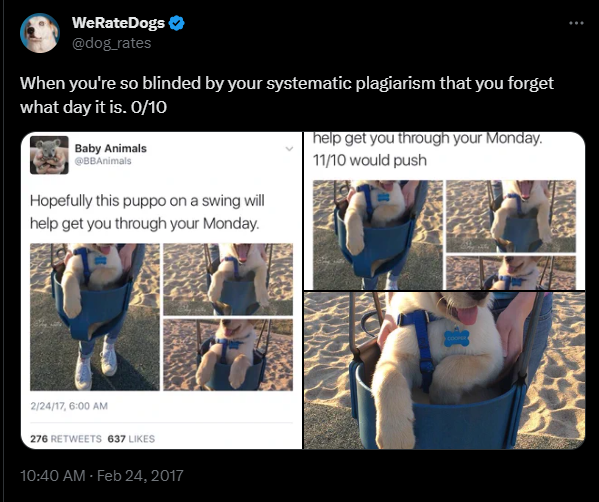
We can just drop this row. It is not relevant, and now we know why they rated something 0/10. The dog definitely isn't a 0!

In [51]:
df_archive_clean = df_archive_clean.drop([315], axis=0)

#### Test

In [52]:
df_archive_clean.loc[df_archive_clean['rating_numerator'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### Issue #7: Large rating_denominator values.

#### Define: Values greater than 10 in the rating_denominator column in df_archive might be errors. We may be able to normalize them to 10 or simply drop them.

#### Code

In [53]:
#Let's see exactly what values we still have in df_archive.
df_archive_clean.rating_denominator.value_counts()

10     2076
50     3   
11     2   
80     2   
7      1   
170    1   
150    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
2      1   
Name: rating_denominator, dtype: int64

We only have 17 records with a denominator not equal to 10. We will drop them. 

In [54]:
df_archive_clean = df_archive_clean[df_archive_clean.rating_denominator == 10]

#### Test

In [55]:
df_archive_clean.rating_denominator.value_counts()

10    2076
Name: rating_denominator, dtype: int64

In [56]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2076 non-null object
timestamp             2076 non-null datetime64[ns]
source                2076 non-null object
text                  2076 non-null object
expanded_urls         2076 non-null object
rating_numerator      2076 non-null int64
rating_denominator    2076 non-null int64
name                  1387 non-null object
dog_stage             335 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 162.2+ KB


### Issue #8 and #9: Redundant prediction columns in df_predictions & predictions that are not actual dogs.

#### Define: I am combining issues 8 and 9 here because in the process of combining the redundant prediction columns, the predictions that are not actual dogs are going to be adjusted to "Not a dog". This is due to using the boolean to choose which dog breed to assign. A value of False will default to "Not a dog" and will solve issue #9.

#### Code

In [57]:
dog_breed = []
confidence = []

#Create a function that will choose the dog breed based on confidence
def prediction(row):
    if row['p1_dog'] == True:
        dog_breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        dog_breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        dog_breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        dog_breed.append('Not a Dog')
        confidence.append(0)

In [58]:
#use pandas apply by columns to call the function and then add columns to df_predictions
df_predictions_clean.apply(prediction, axis=1)

df_predictions_clean['dog_breed'] = dog_breed
df_predictions_clean['confidence'] = confidence

#### Test

In [59]:
#Check a random sample
df_predictions_clean.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,confidence
1111,724046343203856385,https://pbs.twimg.com/media/CgxUTS_XEAAC0pv.jpg,1,boxer,0.826272,True,bull_mastiff,0.158595,True,Great_Dane,0.011859,True,boxer,0.826272
660,682406705142087680,https://pbs.twimg.com/media/CXhlRmRUMAIYoFO.jpg,1,wombat,0.709344,False,koala,0.169758,False,beaver,0.079433,False,Not a Dog,0.000000
1296,752173152931807232,https://pbs.twimg.com/media/CnBBfNuWcAAkOgO.jpg,1,Labrador_retriever,0.527659,True,German_shepherd,0.174765,True,Chihuahua,0.045525,True,Labrador_retriever,0.527659
2028,882627270321602560,https://pbs.twimg.com/media/DD-40X3WAAAJPU5.jpg,1,Pembroke,0.542982,True,Chihuahua,0.251988,True,Cardigan,0.107699,True,Pembroke,0.542982
956,705428427625635840,https://pbs.twimg.com/media/CcovaMUXIAApFDl.jpg,1,Chihuahua,0.774792,True,quilt,0.073079,False,Pembroke,0.022365,True,Chihuahua,0.774792
443,674638615994089473,https://pbs.twimg.com/media/CVzMPh1UsAELQ_p.jpg,1,Pomeranian,0.846986,True,chow,0.142014,True,keeshond,0.002605,True,Pomeranian,0.846986
298,671485057807351808,https://pbs.twimg.com/media/CVGYGNYXAAAQ9m-.jpg,1,Samoyed,0.627901,True,Great_Pyrenees,0.276421,True,kuvasz,0.057874,True,Samoyed,0.627901
1132,728387165835677696,https://pbs.twimg.com/media/ChvAQuMWMAAVaKD.jpg,1,collie,0.266414,True,Great_Pyrenees,0.138546,True,keeshond,0.109014,True,collie,0.266414
1032,711652651650457602,https://pbs.twimg.com/media/CeBMT6-WIAA7Qqf.jpg,1,llama,0.856789,False,Arabian_camel,0.098727,False,neck_brace,0.016377,False,Not a Dog,0.000000
817,692894228850999298,https://pbs.twimg.com/media/CZ2nn7BUsAI2Pj3.jpg,1,German_short-haired_pointer,0.876977,True,bluetick,0.036615,True,basset,0.017848,True,German_short-haired_pointer,0.876977


As expected, in the process of solving the issue with the redundant prediction columns, we have also solved the issue with predictions of orange, bagel, hamster, etc and have adjusted those rows to "Not a dog". 

Let's do a final cleanup with this issue and remove all of the redundant prediction columns, leaving our new dog_breed and confidence columns.

In [60]:
df_predictions_clean = df_predictions_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

In [61]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      2075 non-null object
jpg_url       2075 non-null object
img_num       2075 non-null int64
dog_breed     2075 non-null object
confidence    2075 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.1+ KB


### Issue #10: The breed names in our new dog_breed column are still pretty ugly with some breeds capitalized and words separated by underscores instead of spaces.

#### Define: First we will replace underscores with a space and then we will tackle the capitalization issue.

#### Code

In [62]:
#replace underscore with a space
df_predictions_clean['dog_breed'] = df_predictions_clean['dog_breed'].str.replace('_', ' ')

#### Test

In [63]:
df_predictions_clean.sample(15)

,tweet_id,jpg_url,img_num,dog_breed,confidence
1279,750117059602808832,https://pbs.twimg.com/media/Cmjzc-oWEAESFCm.jpg,2,Shih-Tzu,0.814405
576,678675843183484930,https://pbs.twimg.com/media/CWskEqnWUAAQZW_.jpg,1,Not a Dog,0.000000
387,673352124999274496,https://pbs.twimg.com/media/CVg6L2hWIAAYuEb.jpg,1,golden retriever,0.672808
1658,810984652412424192,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden retriever,0.871342
900,699801817392291840,https://pbs.twimg.com/media/CbYyCMcWIAAHHjF.jpg,2,golden retriever,0.808978
749,687818504314159109,https://pbs.twimg.com/media/CYufR8_WQAAWCqo.jpg,1,Lakeland terrier,0.873029
195,669583744538451968,https://pbs.twimg.com/media/CUrW3DWXIAAiRqk.jpg,1,Not a Dog,0.000000
1278,750101899009982464,https://pbs.twimg.com/media/Cmjlsh1XgAEvhq_.jpg,2,golden retriever,0.316704
370,672975131468300288,https://pbs.twimg.com/media/CVbjRSIWsAElw2s.jpg,1,pug,0.836421
214,670046952931721218,https://pbs.twimg.com/media/CUx8JSEXIAU6zPp.jpg,1,Blenheim spaniel,0.998335


#### Code

In [64]:
#Capitalize first letter in each word
df_predictions_clean['dog_breed'] = df_predictions_clean['dog_breed'].map(str.title)

#### Test

In [65]:
df_predictions_clean.sample(15)

,tweet_id,jpg_url,img_num,dog_breed,confidence
1446,775898661951791106,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,Golden Retriever,0.945523
1082,718454725339934721,https://pbs.twimg.com/media/Cfh2w6HWIAIIYAF.jpg,1,Not A Dog,0.000000
174,669015743032369152,https://pbs.twimg.com/media/CUjSRNCXAAQ6Y_8.jpg,1,Not A Dog,0.000000
734,686947101016735744,https://pbs.twimg.com/media/CYiGvn-UwAEe4wL.jpg,1,Not A Dog,0.000000
767,689275259254616065,https://pbs.twimg.com/media/CZDMMY0WEAAQYjQ.jpg,1,American Staffordshire Terrier,0.215161
974,706901761596989440,https://pbs.twimg.com/media/Cc9rZlBWwAA56Ra.jpg,1,Not A Dog,0.000000
1400,768609597686943744,https://pbs.twimg.com/media/CqqmWa7WcAAIM-n.jpg,1,Basenji,0.183283
1887,847971574464610304,https://pbs.twimg.com/media/C8SZH1EWAAAIRRF.jpg,1,Not A Dog,0.000000
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,Schipperke,0.045519
783,690015576308211712,https://pbs.twimg.com/media/CZNtgWhWkAAbq3W.jpg,2,Malamute,0.949609


### Issue #11: Combine tables.

#### Define: The tables should be combined into one dataframe because they deal with one observational unit.

#### Code

In [66]:
df_tweet_archive_clean = pd.merge(df_archive_clean, df_tweets_clean, 
                         on = 'tweet_id', how = 'left')

In [67]:
df_tweet_archive_clean = pd.merge(df_tweet_archive_clean, df_predictions_clean, 
                         on = 'tweet_id', how = 'left')

#### Test

In [68]:
df_tweet_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,confidence
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Not A Dog,0.000000
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador Retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712


In [69]:
df_tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2075
Data columns (total 15 columns):
tweet_id              2076 non-null object
timestamp             2076 non-null datetime64[ns]
source                2076 non-null object
text                  2076 non-null object
expanded_urls         2076 non-null object
rating_numerator      2076 non-null int64
rating_denominator    2076 non-null int64
name                  1387 non-null object
dog_stage             335 non-null object
retweet_count         2076 non-null int64
favorite_count        2076 non-null int64
jpg_url               1953 non-null object
img_num               1953 non-null float64
dog_breed             1953 non-null object
confidence            1953 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(8)
memory usage: 259.5+ KB


### Additional Issue!

#### Define: After combining the dataframes into one, we have discovered more dogs that do not have pictures. We need to drop those from the cleaned master dataframe.

#### Code

In [70]:
df_tweet_archive_clean = df_tweet_archive_clean.dropna(subset=['jpg_url'])

#### Test

In [71]:
df_tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 2075
Data columns (total 15 columns):
tweet_id              1953 non-null object
timestamp             1953 non-null datetime64[ns]
source                1953 non-null object
text                  1953 non-null object
expanded_urls         1953 non-null object
rating_numerator      1953 non-null int64
rating_denominator    1953 non-null int64
name                  1346 non-null object
dog_stage             303 non-null object
retweet_count         1953 non-null int64
favorite_count        1953 non-null int64
jpg_url               1953 non-null object
img_num               1953 non-null float64
dog_breed             1953 non-null object
confidence            1953 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(8)
memory usage: 244.1+ KB


### Additional issue!

#### Define: img_num should be an integer. We cannot have 1.5 images.

#### Code

In [72]:
df_tweet_archive_clean.img_num = df_tweet_archive_clean.img_num.astype(int)

#### Test

In [73]:
df_tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 2075
Data columns (total 15 columns):
tweet_id              1953 non-null object
timestamp             1953 non-null datetime64[ns]
source                1953 non-null object
text                  1953 non-null object
expanded_urls         1953 non-null object
rating_numerator      1953 non-null int64
rating_denominator    1953 non-null int64
name                  1346 non-null object
dog_stage             303 non-null object
retweet_count         1953 non-null int64
favorite_count        1953 non-null int64
jpg_url               1953 non-null object
img_num               1953 non-null int64
dog_breed             1953 non-null object
confidence            1953 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 244.1+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [74]:
df_tweet_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [75]:
#read twitter_archive_master.csv
df_master = pd.read_csv('twitter_archive_master.csv')

### Insight #1:
#### Which dog breeds appear the most often in the dataset?

First, I am curious which dog breeds are mentioned most often in the dataset according to the machine learning prediction. The predictions are not 100% accurate, but it should be enough to provide a meaningful insight. 

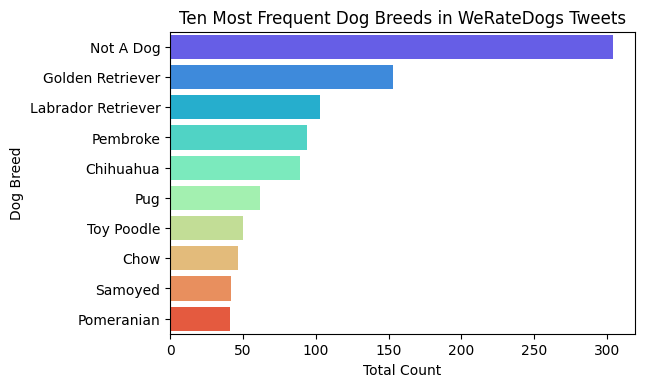

In [76]:
frequent_breeds = (df_master.dog_breed.value_counts().head(10).to_frame().reset_index().rename(columns={'index': 'dog_breed', 'dog_breed': 'total'}))

plt.figure(dpi=100);
ax = sb.barplot(x='total', y='dog_breed', data=frequent_breeds, palette='rainbow');
ax.set_title('Ten Most Frequent Dog Breeds in WeRateDogs Tweets');
ax.set_ylabel('Dog Breed');
ax.set_xlabel('Total Count');

The machine learning algorithm predicted "Not A Dog" for most tweets. It is possible that the predictions are based off of something that was more prominent than the actual dog in the image, but cleaning the predictions like that is out of scope for this project.

Aside from the "Not A Dog" result, the breed most frequently found in the dataset is Golden Retriever! I see nothing wrong with this. Everybody loves those majestic, fluffy goofballs. 

### Insight #2:
#### Which dog names are found most frequently?

Now I would like to see which names are found most frequently in the dataset. 

In [77]:
df_master.name.value_counts().head(10)

Charlie    11
Lucy       10
Oliver     10
Cooper     10
Tucker     9 
Penny      9 
Sadie      8 
Winston    8 
Daisy      7 
Toby       7 
Name: name, dtype: int64

Charlie is the most common dog name. Lucy, Cooper, and Oliver are in a three-way tie for second.

### Insight #3:
#### Is there any correlation between favorite count and retweet count?

Finally, I'd like to find out whether there is a positive or negative correlation between favorite count and retweet count.

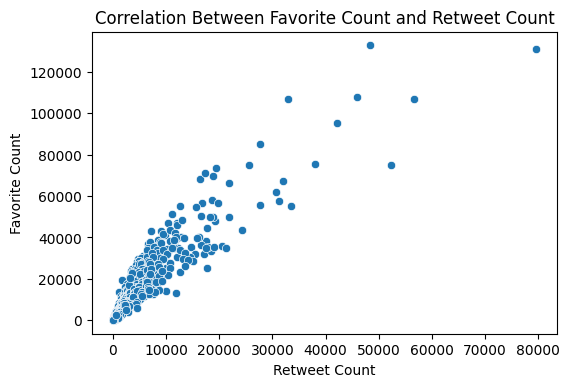

In [83]:
plt.figure(dpi=100);
ax = sb.scatterplot(x = 'retweet_count', y = 'favorite_count', data = df_master);
ax.set_title('Correlation Between Favorite Count and Retweet Count');
ax.set_xlabel('Retweet Count');
ax.set_ylabel('Favorite Count');

There are a few large outliers, but we obviously have a strong positive correlation between favorite count and retweet count. The tweets that have been retweeted the most tend to have the highest favorite count. This makes sense because a higher retweet count means more visibility, which means more people are seeing it and could possibly mark it as a favorite. 